In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib as mpl
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

# Entendimiento y preparación de los datos

In [2]:
data = pd.read_csv('2017-18_NBA_salary.csv')
data.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Como podemos ver, cada datapoint tiene 28 características. Tal vez en un futuro tengamos que prescindir de algunas columnas. Lo que haremos a continuación para comodidad, es hacer que la columna Salary quede de última, pues es la variable dependiente

In [3]:
cols = list(data.columns)
a, b = cols.index('Salary'), cols.index('VORP')
cols[b], cols[a] = cols[a], cols[b]
data = data[cols]
data

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
0,Zhou Qi,-0.2,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,815615
1,Zaza Pachulia,0.7,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,3477600
2,Zach Randolph,0.0,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,12307692
3,Zach LaVine,-0.1,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,3202217
4,Zach Collins,-0.2,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,3057240
5,Yogi Ferrell,0.6,USA,62,24,DAL,79,2238,11.5,0.543,...,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,1312611
6,Xavier Silas,0.0,USA,62,30,BOS,2,7,-4.9,0.000,...,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,74159
7,Xavier Rathan-Mayes,-0.3,Canada,62,23,MEM,5,118,0.9,0.315,...,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,46080
8,Wilson Chandler,0.5,USA,23,30,DEN,70,2200,11.1,0.543,...,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,12016854
9,Willy Hernangomez,0.3,Spain,35,23,TOT,45,430,20.6,0.592,...,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,1435750


# Exploración de los datos

Miremos cuales son los tipos de las caracteristicas de cada datapoint

In [4]:
data.dtypes

Player              object
VORP               float64
NBA_Country         object
NBA_DraftNumber      int64
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM                float64
Salary               int64
dtype: object

Podemos observar que aquí el salario esta en entero, sin embargo, esto podría traernos problemas futuros, por lo que se cambiará a tipo float

In [5]:
data ['Salary'] = data['Salary'].astype(float)
data

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
0,Zhou Qi,-0.2,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,815615.0
1,Zaza Pachulia,0.7,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,3477600.0
2,Zach Randolph,0.0,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,12307692.0
3,Zach LaVine,-0.1,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,3202217.0
4,Zach Collins,-0.2,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,3057240.0
5,Yogi Ferrell,0.6,USA,62,24,DAL,79,2238,11.5,0.543,...,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,1312611.0
6,Xavier Silas,0.0,USA,62,30,BOS,2,7,-4.9,0.000,...,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,74159.0
7,Xavier Rathan-Mayes,-0.3,Canada,62,23,MEM,5,118,0.9,0.315,...,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,46080.0
8,Wilson Chandler,0.5,USA,23,30,DEN,70,2200,11.1,0.543,...,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,12016854.0
9,Willy Hernangomez,0.3,Spain,35,23,TOT,45,430,20.6,0.592,...,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,1435750.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
Player             485 non-null object
VORP               485 non-null float64
NBA_Country        485 non-null object
NBA_DraftNumber    485 non-null int64
Age                485 non-null int64
Tm                 485 non-null object
G                  485 non-null int64
MP                 485 non-null int64
PER                485 non-null float64
TS%                483 non-null float64
3PAr               483 non-null float64
FTr                483 non-null float64
ORB%               485 non-null float64
DRB%               485 non-null float64
TRB%               485 non-null float64
AST%               485 non-null float64
STL%               485 non-null float64
BLK%               485 non-null float64
TOV%               483 non-null float64
USG%               485 non-null float64
OWS                485 non-null float64
DWS                485 non-null float64
WS                 485 non

Como vemos, hay 485 datapoints, y ningun dato tiene caracteristicas null

In [17]:
data.describe(include="all")

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
count,485,485.000000,485,485.000000,485.000000,485,485.000000,485.000000,485.000000,483.000000,...,483.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,4.850000e+02
unique,483,NaN,44,NaN,NaN,31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kay Felder,NaN,USA,NaN,NaN,TOT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,374,NaN,NaN,55,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.598763,NaN,29.451546,26.263918,NaN,50.167010,1154.142268,13.260825,0.535387,...,13.140373,18.897320,1.275464,1.176495,2.455258,0.079959,-1.270722,-0.489485,-1.760206,6.636507e+06
std,NaN,1.245653,NaN,21.125760,4.272297,NaN,24.874872,811.357419,8.769280,0.112352,...,6.115290,5.940536,1.881444,1.034580,2.673670,0.162992,5.026275,2.389343,5.661447,7.392602e+06
min,NaN,-1.300000,NaN,1.000000,19.000000,NaN,1.000000,1.000000,-41.100000,0.000000,...,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,4.608000e+04
25%,NaN,-0.100000,NaN,11.000000,23.000000,NaN,29.000000,381.000000,9.800000,0.505500,...,9.900000,15.000000,0.000000,0.300000,0.300000,0.040000,-2.700000,-1.700000,-3.600000,1.471382e+06
50%,NaN,0.100000,NaN,25.000000,26.000000,NaN,59.000000,1134.000000,13.200000,0.545000,...,12.500000,17.900000,0.800000,1.000000,1.800000,0.083000,-1.100000,-0.400000,-1.300000,3.202217e+06
75%,NaN,0.900000,NaN,47.000000,29.000000,NaN,71.000000,1819.000000,16.500000,0.582500,...,15.750000,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.500000,1.000000e+07


### A continuación analizaremos característica por característica:
#### VORP

Aquí vemos que el mínimo es negativo, es decir, hay jugadores que en vez de ayudar perjudican o, al menos, esa es la interpretación quele damos.

Por otro lado, el máximo es 8.6 y vemos que la media es 0.5, lo que sugiere que ese 8.6 es por alguien como Michael Jordan. Además vemos que el percentil 75% no pasa de 0.9, lo que sugiere que hay una distribución sesgada y/o datos atípicos

#### NBA DraftNumber

Por esta parte la media parece que sí esta como acorde según el máximo y mínimo y los datos parecen que los datos sí están distribuidos bien según los percentiles


#### G

Aquí se ve que la media es 50 y el mínimo es 1 y el máximo es 79 partidos. Esto sugiere que el mínimo podría ser un valor atípico y que no hay muchos jugadores que jueguen pocos partidos (se puede ver en los percentiles también)

#### MP

Con respecto a los minutos jugados, también se puede ver que el mínimo es de 1 minuto y el máximo es de 1898. Además la media es de 1154 lo que sugiere que hay menos jugadores que juegan mucho tiempo y que la gran mayoría de jugadores no juegan los 2898 minutos. Aquí podría decirse que 2898 o 1 son valores atípicos. Más adelante tendríamos que ver con más detalle

#### PER

Aquí también podemos ver sesgo y no solo eso, podemos ver que hay datos atípicos. Se ve que hay cantidad negativa y el máximo es 134. Este 134 parece ser más un valor atípico, pues el percentil 75% apenas llega a 16. Esta información contrasta con el VORP

#### TS%
Aquí vemos algo curioso hay un máximo de 1.5%, pero según los percentiles y la media los valores comunes datan mayoritariamente en 0.5%. Esto sugiere que probablemente el 1.5% sea un valor atípico

#### FTR ORB, OWS y otras métricas de rendimiento del jugador

Estas características parecen tener datos atípicos, más que todo en el máximo y algunos tienen hasta valores negativos. Estas características algunas muestras una distribución sesgada.

#### Salary

Con respecto al salario, comparando el valor mínimo con el máximo, se nota una diferencia aproximada por un factor de 10 * x donde x<10. Sin embargo, no parece haber una distribución muy mala.

### Aspectos generales:

- Las escalas de los datos varían mucho, por lo que en un futuro tal vez sea necesario hacer una normalización
- Hay datos atípicos. Pero en un principio no sería bueno no tenerlos en cuenta, puesto que esos datos atípicos no son atípicos sin ninguna razón y en la vida real estos datos atípicos se pueden dar y se dan. Por lo que pueden ser muy importantes y eliminarlos podría hacer que el modelo no tenga en cuenta la influencia de los datos atípicos en los salarios. En otras palabras, los datos de jugadores muy extraordinarios (aunque pocos) deberían tenerse en cuenta, porque podría servir en caso de que se quiera estimar el salario de un nuevo jugador extraordinario. Sin embargo, hay que ver más adelante cómo se comporta el modelo, ya que estos datos atípicos pueden tener una mala influencia en la estimación de salarios de jugadores "comunes" o viceversa y, además, en tal caso podría ser mejor hacer modelos diferentes según el tipo de jugador.
- Se ve que hay jugadores que se repiten, porque estan en varios equipos

## Ahora utilicemos algunos gráficos para entender mejor la situación

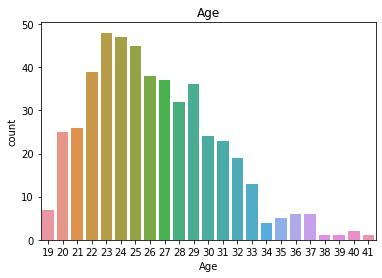

In [8]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[4], data=data)
plt.title(data.columns[4])

plt.show()

Se puede observar que la mayoría de jugadores está entre los 20 a 30 años. Esto es muy importante tenerlo en cuenta, puesto que por ejemplo, si queremos estimar el salario de una persona de 40 o 41 años, tendríamos que tener en cuenta que no se disponen muchos datos con gente de esta edad, por lo que la estmación puede no ser tan confiable. Además de lo anterior, podríamos sugerir que un modelo basado por la edad no podría ser tan confiable. Sin embargo, se hace la salvedad de que la edad sí puede influir, pero más adelante tendremos que hacer más pruebas para revisar esta variable

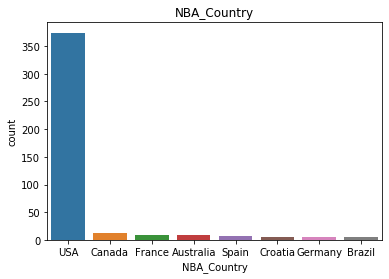

In [9]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[2], data=data, order=data.NBA_Country.value_counts().iloc[:8].index)
plt.title(data.columns[2])

plt.show()

Con respecto al país de procedencia, se puede ver que hay un sesgo bastante alto, la mayoría de jugadores son de USA y de los demás países casi no hay. De hecho, limitamos a los primero 8 países que más tenían y aunque son solo los 8 países que más tienen jugadores en la NBA la diferencia es abismal. Esto podría sugerir que utilizar el país de procedencia para hacer la estimación no es muy buena idea, al igual que la edad, principalmente porque no están equilibradas

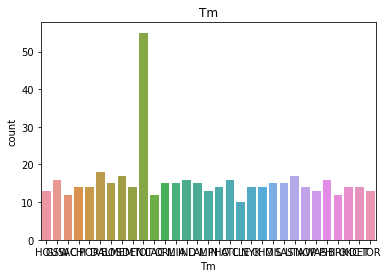

In [10]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[5], data=data)
plt.title(data.columns[5])

plt.show()

Aquí se ve que los jugadores por equipo están medio bien distribuidos, es decir que estas "clases" están equilibradas, a excepción del equipo "TOT". Habrá que hacer algo con ese equipo para equilibrar esta clase, debido a que utilizar un equipo sí puede ser un buen indicador, ya que pueden haber equipos que pagan mejor que otros.

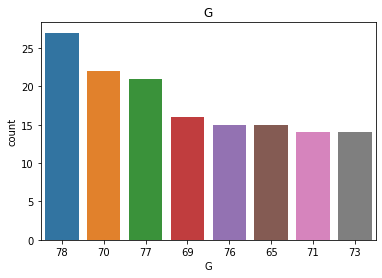

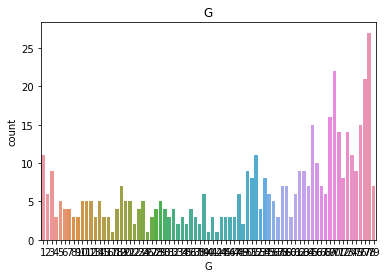

In [11]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[6], data=data, order=data.G.value_counts().iloc[:8].index)
plt.title(data.columns[6])

plt.show()

sns.countplot(x=data.columns[6], data=data)
plt.title(data.columns[6])
plt.show()

Bueno, con respecto a los partidos jugados se ve que existe un poco de desequilibrio, pero tampoco es muy muy desequilibrado. Esta característica sería buena tenerla en cuenta, puesto que entre más partidos juegue una persona, puede indicar que es más solicitado y/o apreciado y así puede reflejarse en su salario. Además, la cantidad por grupo de jugadores agrupados por juegos jugados no varía mucho pues el rango va entre [0,30].

Ahora bien, estas son las características que se podían analizar con un gráfico de barras. Con respecto a las otras características se hará más adelante otro tipo de gráficas.

Text(0.5, 1.0, 'G')

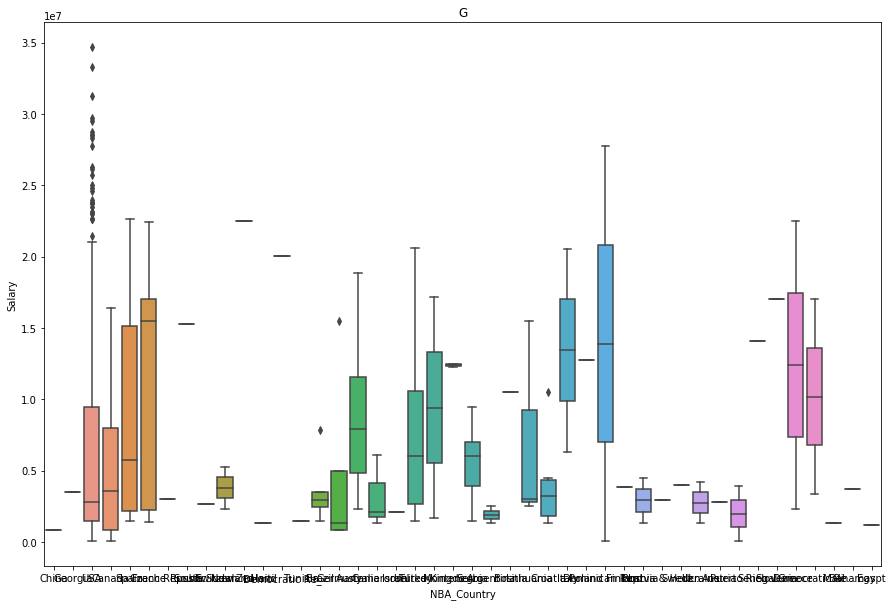

In [27]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[2], y=data['Salary'], data=data)
plt.title(var_num)

Text(0.5, 1.0, 'G')

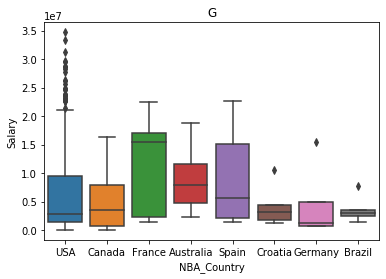

In [26]:
sns.boxplot(x=data.columns[2], y=data['Salary'], data=data, order=data.NBA_Country.value_counts().iloc[:8].index)
plt.title(var_num)

Se puede observar que el salario con respecto al pais de procedencia sí genera diferentes distribuciones y, en general, hay un sesgo positivo en las distribuciones. Sin embargo, se puede notar que hay diferencia en los salarios según el país con respecto al rango. Además, USA tiene muchos datos atípicos

Text(0.5, 1.0, 'G')

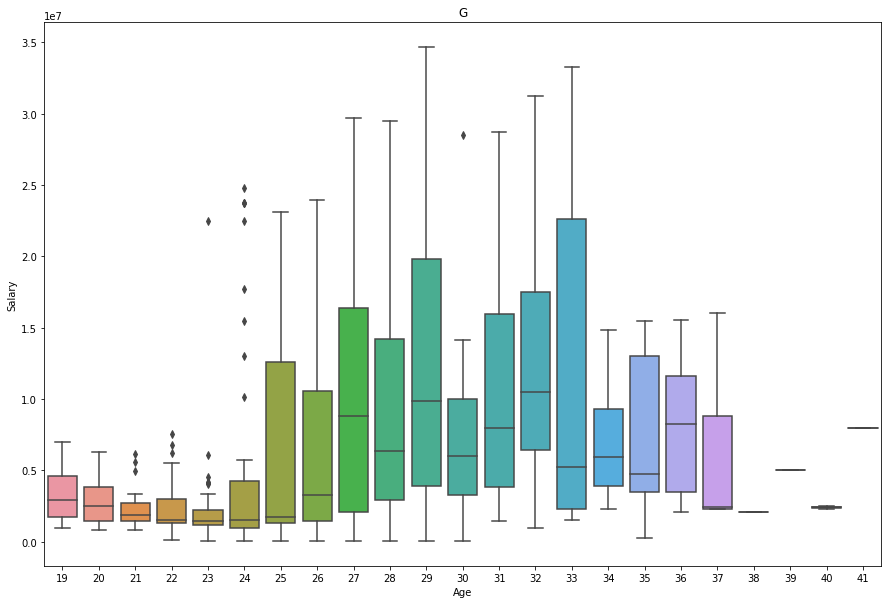

In [34]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[4] ,y=data['Salary'], data=data)
plt.title(var_num)

Aquí podemos ver que de igual manera las distribuciones varían por edad y también resalta una cosa que habíamos dicho anteriormente: entre las edades 20 a 30 años, las cajas son más amplias, lo que sugiere que hay un rango más alto en las distribuciones y esto puede ser causado por el hecho de que es en estas edades donde hay más población

Text(0.5, 1.0, 'G')

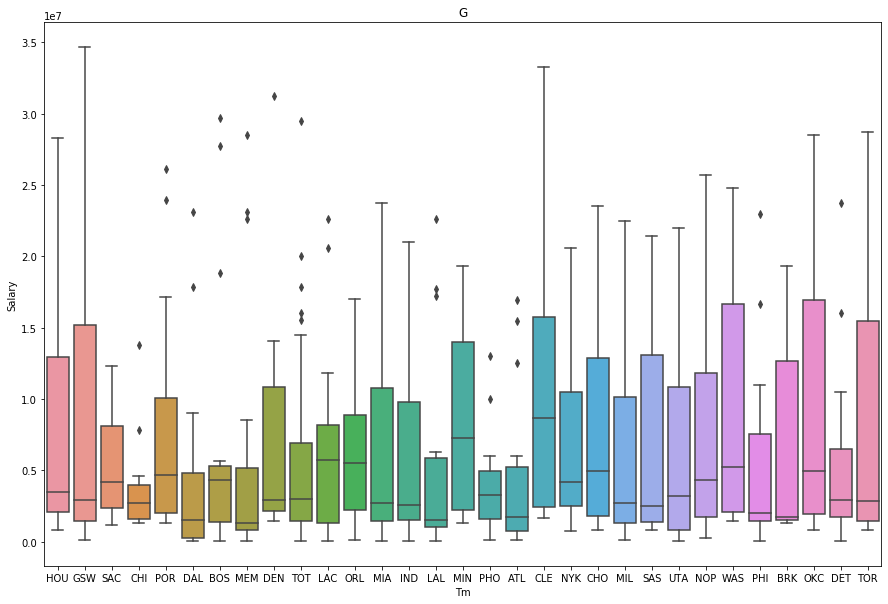

In [38]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[5], y=data['Salary'], data=data)
plt.title(var_num)


Con respecto a los equipos y sus salarios, también hay diferentes distribuciones pero estan casi en el mismo rango. Además se nota que algunos equipos tienen más sesgo positivo que otros.

Text(0.5, 1.0, 'G')

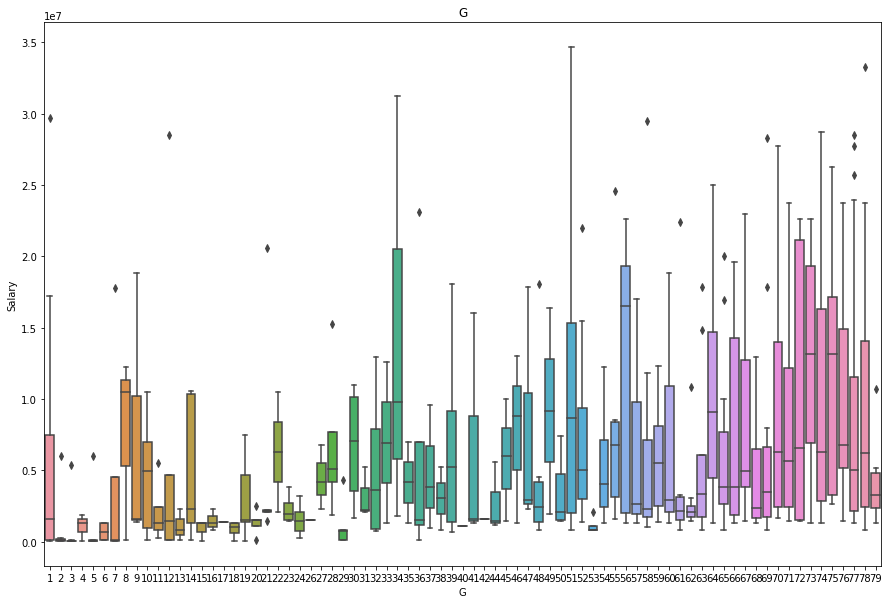

In [30]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[6], y=data['Salary'], data=data)
plt.title(var_num)

Aquí se puede ver entre más juegos participe un jugador, la distribución es más amplia y, de hecho la mayoría tiene un sesgo positivo. Esto puede sugerir, aunque no es seguro, que entre mayor sea la participación de un jugador, tiene la posibilidad de tener salarios mayores

#### Hay varias cosas para resaltar en general

- En primer lugar, el salario ha dado diferentes distribucion según la característica evaluada. Esto no sugiere una conexión directa, pero sí sugiere que si agrupamos por esas características analizadas, se podrían sacar algunas observaciones

- Hay muchas distribuciones, sin embargo el rango de cada distribución no varía mucho

Hasta ahora solo hemos visto cómo se comportan algunas variables, pero no hemos tocado todas las variables. Además, no hemos visto cómo son las distribuciones de las demás características. 